In [1]:
from keras.datasets import imdb
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import models

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

17464789/17464789 [==============================] - 378s 22us/step


In [5]:
##training data shape review
print("Training data: ")
print(X.shape)
print(y.shape)
print("Classes: ")
print(np.unique(y))

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]


In [6]:
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


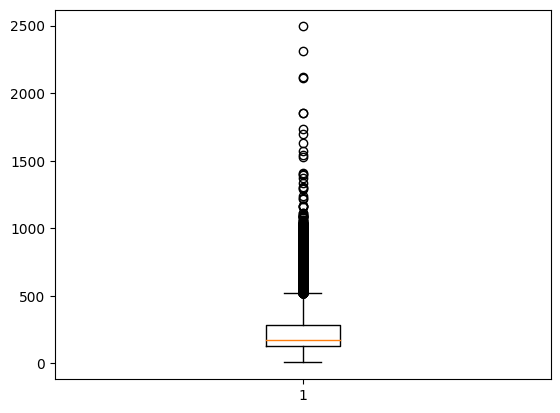

In [7]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

In [9]:
def vectorize_sequences(sequences, dimension=5000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [10]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [11]:
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
#Set validation set aside

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [18]:
start_time_m1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1

Epoch 1/10
30/30 [==============================] - 18s 602ms/step - loss: 0.3734 - acc: 0.8641 - val_loss: 0.3070 - val_acc: 0.8772
Epoch 2/10
30/30 [==============================] - 1s 39ms/step - loss: 0.2303 - acc: 0.9153 - val_loss: 0.2878 - val_acc: 0.8842
Epoch 3/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1805 - acc: 0.9337 - val_loss: 0.2981 - val_acc: 0.8805
Epoch 4/10
30/30 [==============================] - 1s 38ms/step - loss: 0.1484 - acc: 0.9461 - val_loss: 0.3196 - val_acc: 0.8769
Epoch 5/10
30/30 [==============================] - 1s 46ms/step - loss: 0.1219 - acc: 0.9593 - val_loss: 0.3526 - val_acc: 0.8699
Epoch 6/10
30/30 [==============================] - 1s 43ms/step - loss: 0.1018 - acc: 0.9668 - val_loss: 0.3773 - val_acc: 0.8686
Epoch 7/10
30/30 [==============================] - 2s 58ms/step - loss: 0.0793 - acc: 0.9761 - val_loss: 0.4162 - val_acc: 0.8645
Epoch 8/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0653 -

In [19]:
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

The Dense Convolutional Neural Network 1 layer took 30.1341 seconds to train.


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

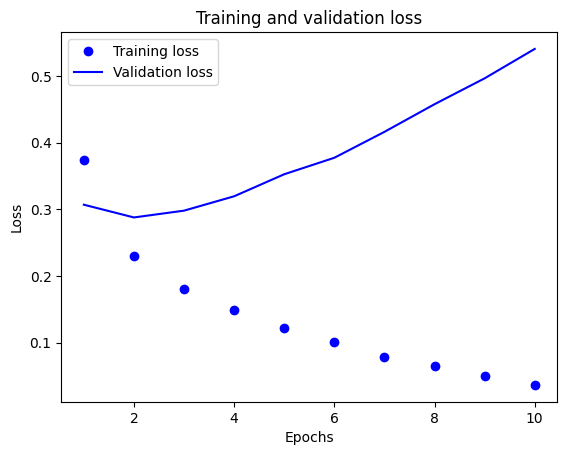

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

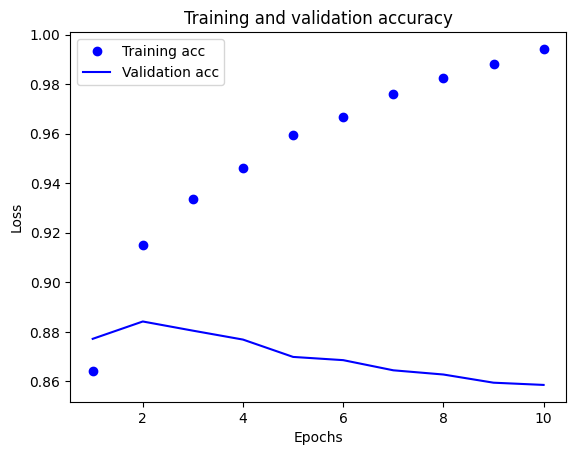

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161,121
Trainable params: 161,121
Non-trainable params: 0
_________________________________________________________________


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc
#predictions
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)

#accuracy
accuracy_score(y_test,classes_x)

782/782 [==============================] - 5s 5ms/step


0.5

[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

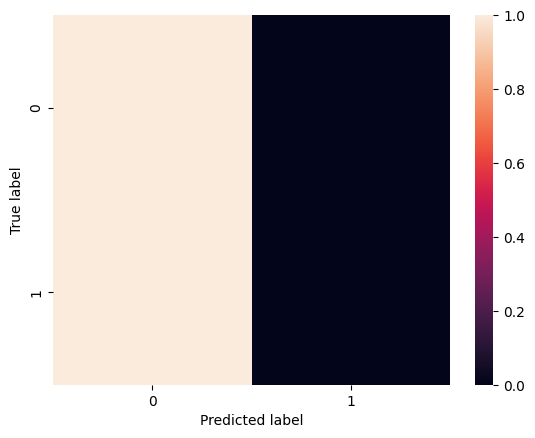

In [25]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [26]:
#Dense with Two Layer
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [24]:
start_time_m2 = time.time()
history= model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m2 = time.time() - start_time_m2

print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))

Epoch 1/20
30/30 [==============================] - 8s 89ms/step - loss: 0.5088 - acc: 0.7919 - val_loss: 0.3264 - val_acc: 0.8686
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2552 - acc: 0.9037 - val_loss: 0.2948 - val_acc: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1877 - acc: 0.9291 - val_loss: 0.3012 - val_acc: 0.8820
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1506 - acc: 0.9465 - val_loss: 0.3366 - val_acc: 0.8759
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1257 - acc: 0.9552 - val_loss: 0.3728 - val_acc: 0.8722
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1031 - acc: 0.9657 - val_loss: 0.4202 - val_acc: 0.8670
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0829 - acc: 0.9721 - val_loss: 0.4784 - val_acc: 0.8615
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0634 - a

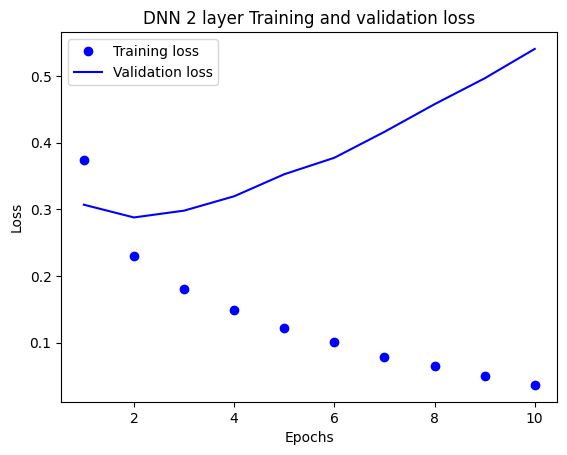

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('DNN 2 layer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

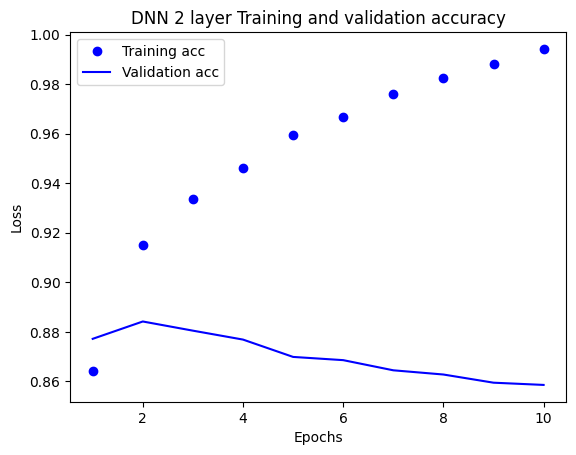

In [29]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160032    
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162,177
Trainable params: 162,177
Non-trainable params: 0
_________________________________________________________________


In [31]:
from numpy.ma.core import argmax
pred = model2.predict(x_test)
classes_x=argmax(pred,axis=-1)
#accuracy
accuracy_score(y_test,classes_x)

782/782 [==============================] - 2s 3ms/step


0.5